In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import statsmodels.api as sm

In [291]:
#KOSIS인구동향조사 출생아수 1970~2023
ts = pd.read_csv('출생아수__합계출산율__자연증가_등_20240513015714.csv', encoding='utf-8',header=None)
ts.head(5)#행렬위치를 바꾸자
ts0=ts.transpose()#행렬위치바꿈
ts0.columns=ts0.iloc[0]
ts0.drop(0,inplace=True)

In [292]:
print(ts0.shape)
display(ts0.head(5))
display(ts0.tail(5))

(54, 2)


,기본항목별,출생아수(명)
1,1970,1006645
2,1971,1024773
3,1972,952780
4,1973,965521
5,1974,922823


,기본항목별,출생아수(명)
50,2019,302676
51,2020,272337
52,2021,260562
53,2022,249186
54,2023 p),230000


In [293]:
ts0.columns=['Year','births']#열이름바꾸기
ts0.iloc[-1,0]=2023#마지막행 값 바꾸기

In [294]:
ts0.info() #결측치없음 연속형변수로 값바꾸기
ts0['Year']=ts0['Year'].astype('int')
ts0['births']=ts0['births'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    54 non-null     object
 1   births  54 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [295]:
ts0.info() #결측치없음 연속형변수로 값바꾸기

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    54 non-null     int64
 1   births  54 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


# **EDA를해보자**

*  필요한 column만 남기고 날짜를 인덱스로 변환하기

In [296]:
# 인덱스 설정 후 drop
ts0.set_index('Year',inplace=True)

In [297]:
#시각화
def plot_ts(data, color, alpha, label):

    plt.figure(figsize=(11,5))
    plt.plot(data, color=color, alpha=alpha, label=label)
    plt.title("number of births")
    plt.xlabel('Year')
    plt.ylabel('birhts')
    plt.legend()
    plt.show()

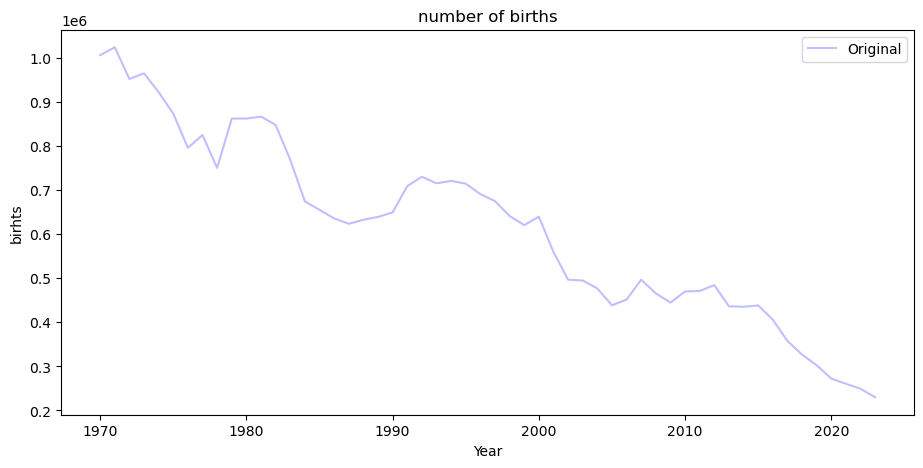

In [298]:
plot_ts(ts0, 'blue', 0.25, 'Original')

# **시계열 데이터의 정상성 검정: ADF**

* statsmodels의 adfuller 함수를 통해 검정 실시
출력값 순서

1.   ADF 통계량
2.   p-value
3.   usedlag (The number of lags used)
4.   nobs (The number of observations used for the ADF regression and calculation of the critical values.)
5.   critical values (기각역)
6.   icbest (The maximized information criterion if autolag is not None.)

In [299]:
from statsmodels.tsa.stattools import adfuller

adfuller(ts0, autolag='AIC') #비정상성데이터이다.

(-0.856836493905405,
 0.8018543970108576,
 3,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 987.0692810816017)

* ADF 결과 중 통계량, p-value, 기각역을 계산하고, 출력하는 함수 정의 및 실행

In [300]:
def ADF_test(data):
	# ADF 실시
    results = adfuller(data, autolag='AIC')

    # 통계량
    s = results[0]
    # p-value
    p = results[1]
    # 기각역
    cv = results[4]

    # 출력
    print('-'*30)
    print('Augemented Dickey-Fuller Test')
    print('H0 : 단위근이 존재한다 (비정상 시계열)')
    print('Ha : 단위근이 없다 (정상 시계열)')
    print('Critical Values : {}'.format(cv))
    print('-'*30)
    print('Test Statistics : {:.4f}'.format(s))
    print('p-value : {:.4f}'.format(p))
    print('-'*30)

In [301]:
# ts 데이터로 ADF 실행해보기
ADF_test(ts0)


#비정상시계열임을 알수있다.

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
------------------------------
Test Statistics : -0.8568
p-value : 0.8019
------------------------------


* 이동 평균 함수를 이용한 평균 및 표준편차 분포 시각화

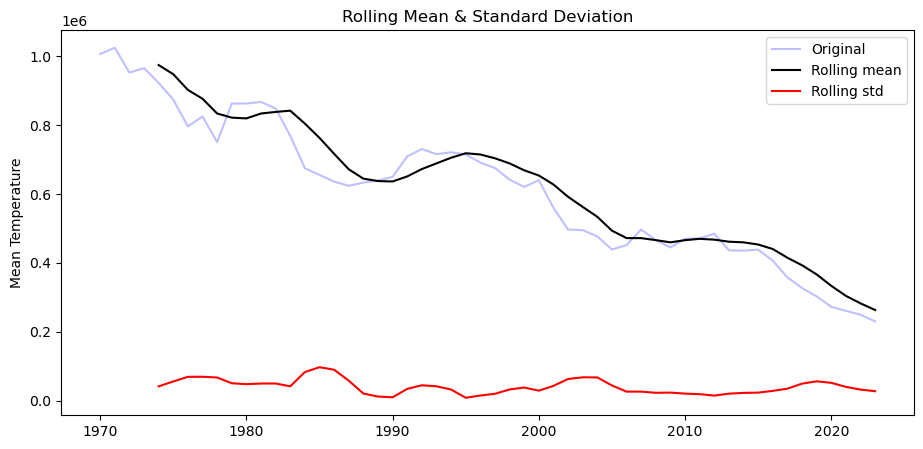

In [303]:
def plot_rolling(data, roll_size):
    # 이동평균함수(rolling) - 평균, 표준편차
    roll_mean = data.rolling(window=roll_size).mean()
    roll_std = data.rolling(window=roll_size).std()

    # 시각화
    plt.figure(figsize=(11,5))
    plt.plot(data, color='blue', alpha=0.25, label='Original')
    plt.plot(roll_mean, color='black', label='Rolling mean')
    plt.plot(roll_std, color='red', label='Rolling std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylabel("Mean Temperature")
    plt.legend()
    plt.show()

# 함수 실행
plot_rolling(ts0, 5)

# **Differencing으로 정상시계열 만들기**

*  방법 1. `.shift()` 함수 사용

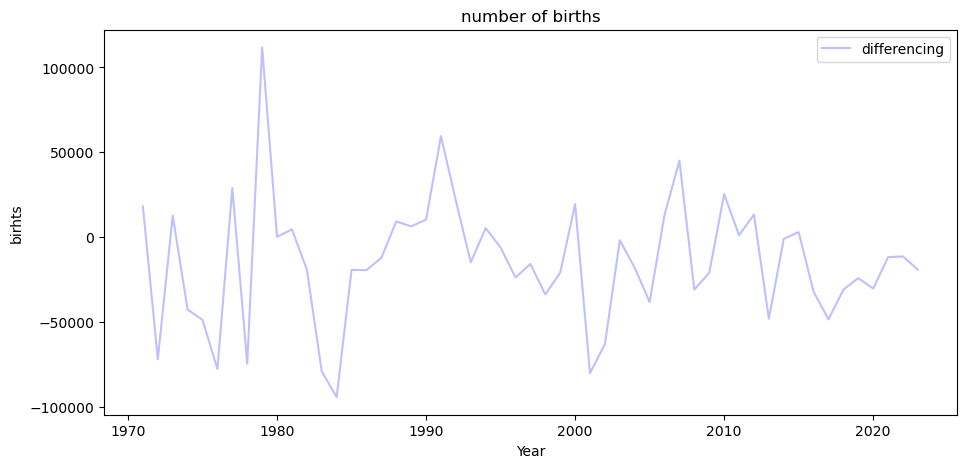

In [343]:
# ts에서 ts.shift(1)을 빼기 (1차 차분)
ts0_diff = ts0 - ts0.shift() # default=1임

# 시각화
plot_ts(ts0_diff, color='blue', alpha=0.25, label='differencing')

* 이동평균 시각화 및 ADF 테스트 실시

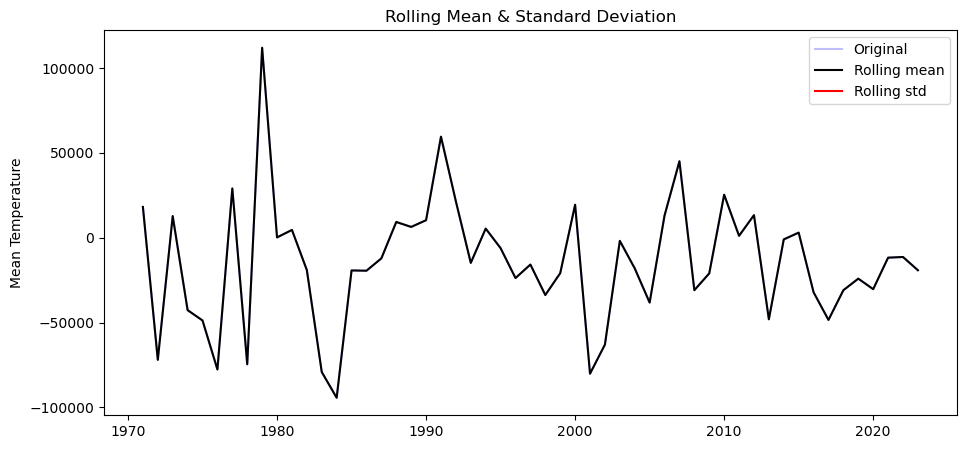

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
------------------------------
Test Statistics : -3.3976
p-value : 0.0110
------------------------------


In [339]:
plot_rolling(ts0_diff, 1) #여기서 위의 그래프와같은 이유는 1차차분과 이동평균 시각화값이 비슷한방식이기 때문이다.
ADF_test(ts0_diff.dropna()) #정상시계열 값으로 나옴

*  방법 2. `.diff()` 함수 사용

In [362]:
# 차분
ts0_diff2 = ts0.diff().dropna()

# ADF 테스트
ADF_test(ts0_diff2)#정상시계열임

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
------------------------------
Test Statistics : -3.3976
p-value : 0.0110
------------------------------


# **ARIMA로 출산율 예측하기**

* ACF, PACF 계산 및 시각화

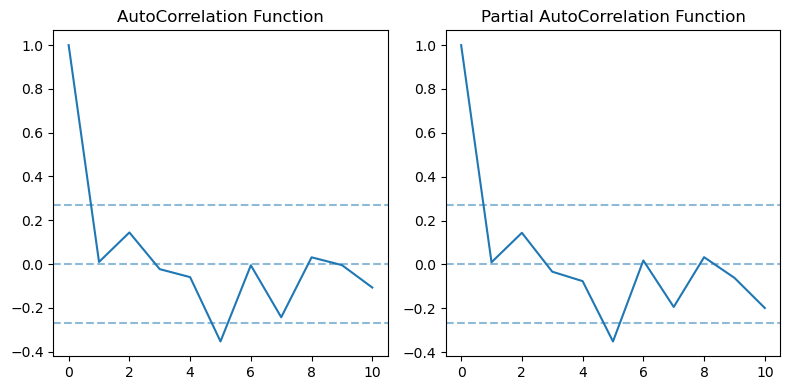

In [319]:
# ACF and PACF
from statsmodels.tsa.stattools import acf, pacf

# ACF
acf_12 = acf(x=ts0_diff2, nlags=10)
# PACF
pacf_12 = pacf(x=ts0_diff2, nlags=10, method='ols')

# 95% 신뢰구간 계산하기
confidence = 1.96/np.sqrt(len(ts0_diff2))

# 시각화
plt.figure(figsize=(8,4))
# ACF
plt.subplot(1,2,1)
plt.plot(acf_12)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('AutoCorrelation Function')
# PACF
plt.subplot(1,2,2)
plt.plot(pacf_12)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('Partial AutoCorrelation Function')

plt.tight_layout()

### ARIMA(p, d, q)


*   최적 q값 (신뢰구간 최초 진입 시점) \\
    ACF (q, MA) = 1
*   최적 p값 (신뢰구간 최초 진입 시점) \\
	  PACF (p, AR) = 1
*   예상되는 최적의 ARIMA 모델 \\
    ARIMA(1, 1, 1)

In [322]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA

# index를 period로 변환해주어야 warning이 뜨지 않음
ts0_copy = ts0.copy()
ts0_copy.index = pd.PeriodIndex(ts0.index, freq='Y')

# 예측을 시작할 위치(이후 차분을 적용하기 때문에 맞추어주었음
start_idx = ts0_copy.index[1]

# ARIMA(1,1,1)
model1 = ARIMA(ts0_copy, order=(1,1,1))
# fit model
model1_fit = model1.fit()

# 전체에 대한 예측 실시
forecast1 = model1_fit.predict(start=start_idx)
forecast1.index = ts0.index[1:]
forecast1

Year
1971    9.877952e+05
1972    1.005924e+06
1973    9.356695e+05
1974    9.484628e+05
1975    9.069182e+05
1976    8.593905e+05
1977    7.835412e+05
1978    8.121547e+05
1979    7.393389e+05
1980    8.490625e+05
1981    8.494398e+05
1982    8.541217e+05
1983    8.356516e+05
1984    7.584592e+05
1985    6.663916e+05
1986    6.476517e+05
1987    6.287437e+05
1988    6.169427e+05
1989    6.260830e+05
1990    6.323690e+05
1991    6.425266e+05
1992    7.007301e+05
1993    7.217285e+05
1994    7.073559e+05
1995    7.126929e+05
1996    7.067887e+05
1997    6.836904e+05
1998    6.683485e+05
1999    6.354864e+05
2000    6.151648e+05
2001    6.341570e+05
2002    5.561261e+05
2003    4.947712e+05
2004    4.929695e+05
2005    4.753857e+05
2006    4.381531e+05
2007    4.508682e+05
2008    4.947511e+05
2009    4.646643e+05
2010    4.441953e+05
2011    4.688467e+05
2012    4.699253e+05
2013    4.828659e+05
2014    4.360915e+05
2015    4.351030e+05
2016    4.380099e+05
2017    4.067189e+05
2018    

* 예측 시각화 및 오차함수(MSE) 함수 정의 및 실시

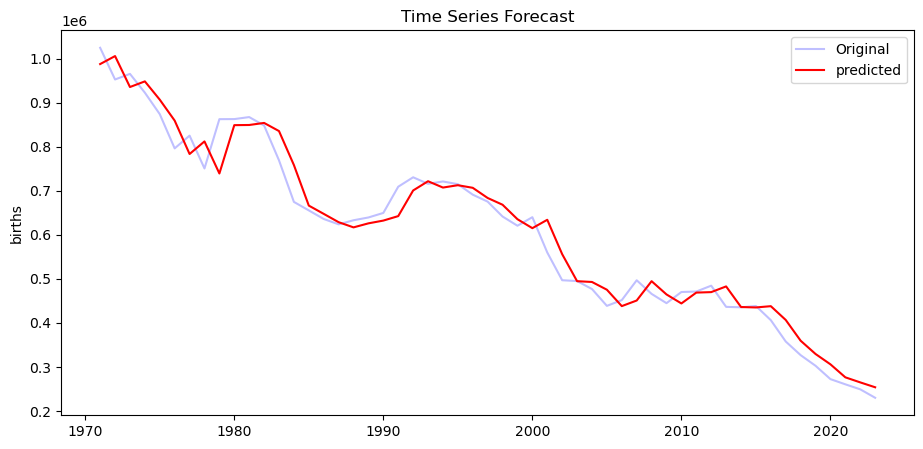

Mean Squared Error : 1444561833.2959


In [326]:
from sklearn.metrics import mean_squared_error

def plot_and_error(data, forecast):
    # MSE 계산
    mse = mean_squared_error(data, forecast)
    # 시각화
    plt.figure(figsize=(11,5))
    plt.plot(data, color='blue', alpha=0.25 , label='Original')
    plt.plot(forecast, color='red', label='predicted')
    plt.title("Time Series Forecast")
    plt.ylabel("births")
    plt.legend()
    plt.show()
    # MSE 출력
    print('Mean Squared Error : {:.4f}'.format(mse))

plot_and_error(ts0[1:]['births'], forecast1)

# Auto ARIMA
* 현재까지는 ARIMA의 p,d,q값을 직접적으로 설정하는 방식을 통해 모델링과 최적화를 진행하였지만, ACF나 PACF의 경우엔 다소 주관적으로 판단해야하는 경우가 있었습니다.
* Auto ARIMA는 이러한 파라미터의 탐색과정을 자동화하여 보다 쉽고 정확하게 가장 높은 성능을 이끌어 낼 수 있도록 최적화할 수 있도록 하는 Tool이며, Auto ARIMA를 지원하는 다양한 라이브러리들이 있습니다.
* 보통 머신러닝에서는 Grid Search나 Bayesian Search를 통해 하이퍼파라미터를 최적화하는데, Auto ARIMA는 Bayesian Search의 방식에 좀 더 가까운 방식으로 동작합니다.
* stepwise algorithm : Hyndman and Khandakar (2008)의 알고리즘으로 가능한 모든 조합을 찾는 것이 아닌 주어진 상황에서 확률적으로 파라미터들을 바꾸어보면서 최적화를 진행하는 방식

In [331]:
train = ts0['births'][:int(0.8*len(ts0))]
test = ts0['births'][int(0.8*len(ts0)):]

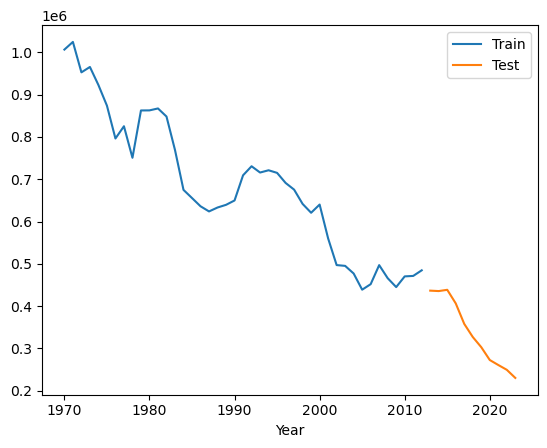

In [332]:
# 시각화로 확인하기.
train.plot(label='Train')
test.plot(label='Test')
plt.legend()
plt.show()

## 최적 차분 수 구하기
`pmdarima` 라이브러리를 통해 최적의 차분 수를 구함.

In [337]:
import pmdarima as pm

kpss_diffs = pm.arima.ndiffs(train, alpha=0.05, test='kpss', max_d=5)
adf_diffs = pm.arima.ndiffs(train, alpha=0.05, test='adf', max_d=5)
n_diffs = max(kpss_diffs, adf_diffs)

print(f"Optimized 'd' = {n_diffs}")  #위에서는 차분한번만 해도 정상성이 고려됬는데?

Optimized 'd' = 3


## Auto ARIMA를 통한 모델링


In [365]:
# 직접 지정해주어 모델링 실시
model = pm.auto_arima(y=train,		# 데이터
                      d=3,	# 차분 (d), 기본값 = None
                      start_p= 0,	# 시작 p값, 기본값 = 2
                      max_p = 5,	# p 최대값, 기본값 = 5
                      start_q= 0,	# 시작 q값, 기본값 = 2
                      max_q = 5,	# q 최대값, 기본값 = 5
                      m=1,			# season의 주기, 기본값 = 1
                      seasonal=False,	# sARIMA를 실시, 기본값 = True
                      stepwise=True,	# stepwise algorithm, 기본값 = True
                      trace=True)		# 각 step을 출력할지, 기본값 = False

Performing stepwise search to minimize aic
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=1037.798, Time=0.01 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=1054.386, Time=0.01 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=982.532, Time=0.02 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=983.524, Time=0.02 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=982.825, Time=0.02 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=985.079, Time=0.02 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=1028.403, Time=0.01 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,3,1)(0,0,0)[0] intercept   : AIC=987.916, Time=0.01 sec

Best model:  ARIMA(1,3,1)(0,0,0)[0]          
Total fit time: 0.172 seconds


In [347]:
#자동
model2 = pm.auto_arima(train, d=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=1037.798, Time=0.00 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=1054.386, Time=0.01 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=982.532, Time=0.01 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=983.524, Time=0.02 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=982.825, Time=0.02 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=985.079, Time=0.02 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=1028.403, Time=0.01 sec
 ARIMA(1,3,1)(0,0,0)[0] intercept   : AIC=987.916, Time=0.01 sec

Best model:  ARIMA(1,3,1)(0,0,0)[0]          
Total fit time: 0.176 seconds


In [348]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(1, 3, 1)   Log Likelihood                -488.266
Date:                Sun, 12 May 2024   AIC                            982.532
Time:                        18:52:19   BIC                            987.599
Sample:                             0   HQIC                           984.364
                                 - 43                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5603      0.177     -3.172      0.002      -0.907      -0.214
ma.L1         -0.9851      0.297     -3.313      0.001      -1.568      -0.402
sigma2      2.784e+09   9.09e-11   3.06e+19      0.000    2.78e+09    2.78e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.47   Prob(JB):                         0.39
Heteroskedasticity (H):               0.60   Skew:                             0.53
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.74e+35. Standard errors may be unstable.
"""

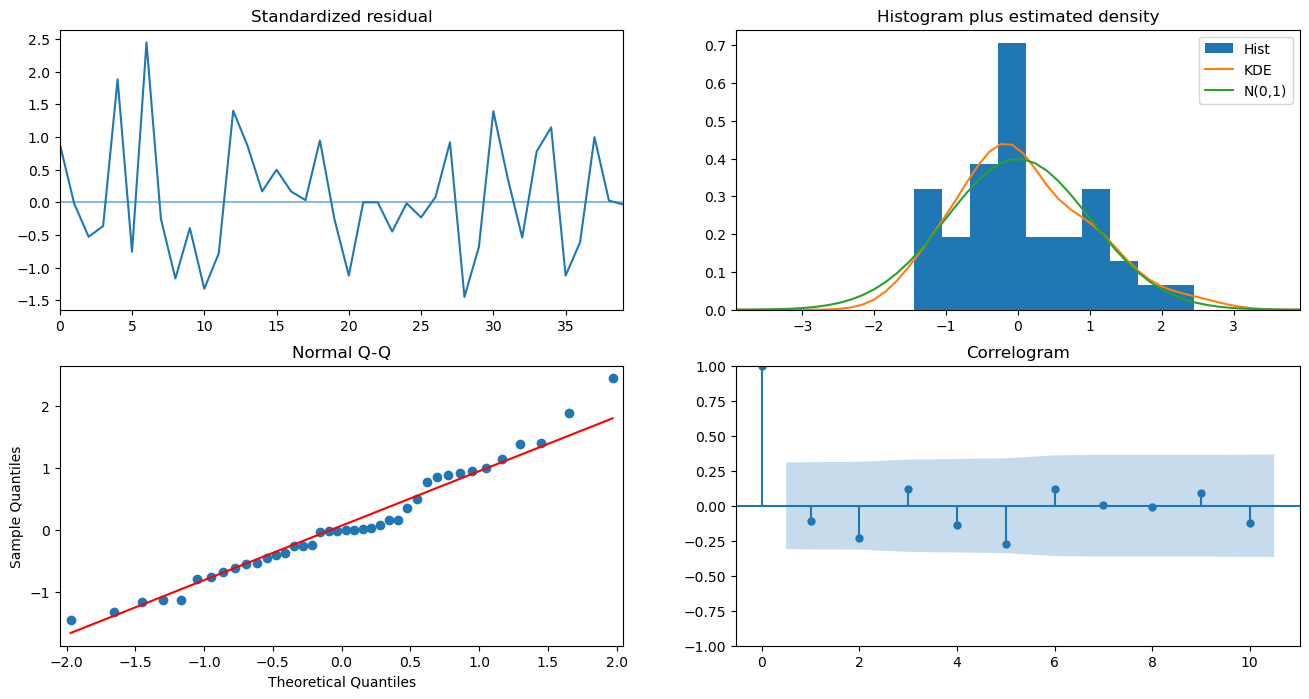

In [349]:
#시각화를 통한 정상성 확인
model2.plot_diagnostics(figsize=(16,8))
plt.show()

## 예측 및 평가

In [350]:
# 예측 -> 리스트로 변환
pred = model2.predict(n_periods=len(test)).to_list()
# 데이터프레임 생성
test_pred = pd.DataFrame({'test':test, 'pred':pred}, index=test.index)
test_pred

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,test,pred
Year,,
2013,436455,491419.696894
2014,435435,502300.038198
2015,438420,511348.897134
2016,406243,521839.879793
2017,357771,531938.637615
2018,326822,542673.038507
2019,302676,553467.121904
2020,272337,564643.624385
2021,260562,576021.702146


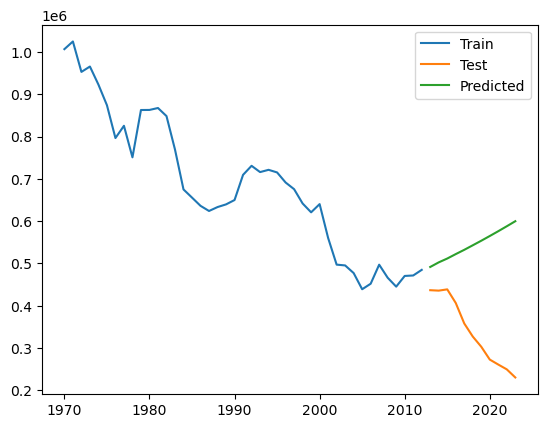

In [351]:
# 시각화
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_pred.pred, label='Predicted')
plt.legend()
plt.show()

## 한 지점에 대한 예측을 진행하고, 모델을 업데이트 하는 방식

In [352]:
# one point forcast 함수 정의, 신뢰구간도 함께 담아보기
def forcast_one_step():
    fc, conf = model2.predict(n_periods=1, return_conf_int=True)
    return fc.tolist()[0], np.asarray(conf).tolist()[0]

# 값들을 담을 빈 리스트를 생성
y_pred = []
pred_upper = []
pred_lower = []

# for문을 통한 예측 및 모델 업데이트를 반복함
for new_ob in test:
    fc, conf = forcast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])
    model2.update(new_ob)

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [353]:
# to dataframe
test_pred2 = pd.DataFrame({'test':test, 'pred':y_pred})
y_pred_df = test_pred2['pred']	# Series로 반환
y_pred_df

Year
2013    491419.696894
2014    422055.415813
2015    406869.946762
2016    439281.024133
2017    393112.898990
2018    316771.621670
2019    284890.596566
2020    273908.203490
2021    244485.434406
2022    238018.627035
2023    237318.259562
Name: pred, dtype: float64

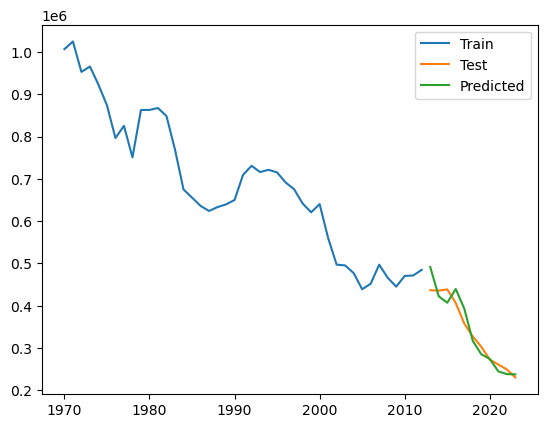

In [354]:
# 시각화
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_df, label='Predicted')
plt.legend()
plt.show()

In [355]:
# 업데이트 된 모델 분석
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(1, 3, 1)   Log Likelihood                -619.339
Date:                Sun, 12 May 2024   AIC                           1244.677
Time:                        18:55:06   BIC                           1250.473
Sample:                             0   HQIC                          1246.892
                                 - 54                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5510      0.175     -3.154      0.002      -0.893      -0.209
ma.L1         -0.9818      0.283     -3.471      0.001      -1.536      -0.427
sigma2      2.784e+09   8.37e-11   3.33e+19      0.000    2.78e+09    2.78e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 3.13
Prob(Q):                              0.43   Prob(JB):                         0.21
Heteroskedasticity (H):               0.36   Skew:                             0.57
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.11e+36. Standard errors may be unstable.
"""

In [356]:
# 예측 모델 오차 계산 (MAPE)
# sklearn으로 MAPE 계산
from sklearn.metrics import mean_absolute_percentage_error
print(f"MAPE : {mean_absolute_percentage_error(test, y_pred):.3f}")

MAPE : 0.058


In [ ]:
# 차분개수가 다르다.
# 한지점에 대한 예측을 진행하고 모델을 업데이트하는 방식이 무엇인가?
# 그림4개중 Correlogram은 무엇인가? ACF그래프라는거